In [1]:
import Pkg; 
Pkg.activate(".."); Pkg.instantiate();
using RxInfer, Random, Plots, StableRNGs

  Activating project at `/ws`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /ws/Manifest.toml:0


In [2]:
# DATAGENERATION

rng = StableRNG(42)
position = 2.5
variance = 0.5

0.5

In [3]:
function generate_data(u, v, N)
  noise = rand(rng, Normal(0, v), N)
  y = u .+ noise
  return y
end

y_data = generate_data(position, variance, 10)

10-element Vector{Float64}:
 2.1648741539427165
 2.7235609212316914
 3.1868153489917126
 3.154769747819054
 2.563035010904655
 2.8419739654982705
 1.9903987737717266
 2.103243579181932
 3.3873623167184084
 3.148673072608817

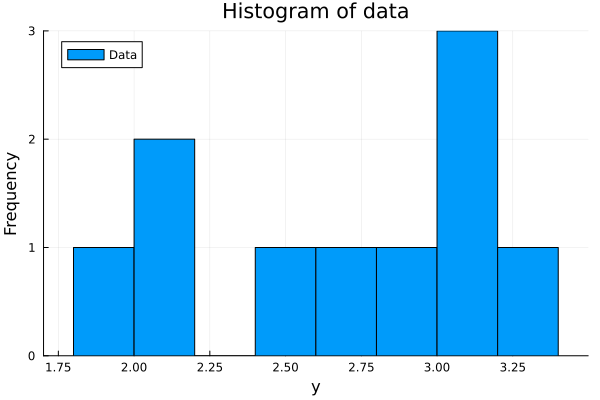

In [4]:
histogram(y_data, bins=10, label="Data", xlabel="y", ylabel="Frequency", title="Histogram of data")

#### Model Definition

In [5]:
@model function one_dim_model(a, b, y)
  u ~ Normal(mean=a, variance=b)

  for i in 1:length(y)
    y[i] ~ Normal(mean=u, variance=0.5)
  end
end


In [6]:
result = infer(
  model          = one_dim_model(a=0, b=5),
  data           = (y=y_data,),
  #keephistory    = 100,
  #historyvars    = (u = KeepLast(), ),
  #initialization = imarginals,
)

Inference results:
  Posteriors       | available for (u)


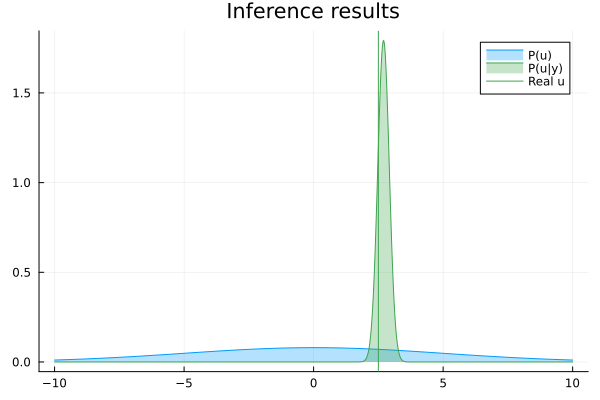

In [9]:
u_estimated = result.posteriors[:u]
rθ = range(-10, 10, length = 1000)

p = plot(title = "Inference results")

plot!(rθ, (x) -> pdf(Normal(0, 5.0), x), fillalpha=0.3, fillrange = 0, label="P(u)", c=1,)
plot!(rθ, (x) -> pdf(u_estimated, x), fillalpha=0.3, fillrange = 0, label="P(u|y)", c=3)
vline!([position], label="Real u")

savefig(p, "figures/1D-Static.png")
display(p)